<a href="https://colab.research.google.com/github/vicky-getova/FYP/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# Mounting OneDrive to the notebook in order to load the dataset folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Extracting the folder from OneDrive to a folder in a the notebook
!cp "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB_data.zip" "ALL_IDB.zip"

In [78]:
# Unzipping the dataset folder in a new folder
!unzip -uq "ALL_IDB.zip" -d "ALL_IDB"

In [79]:
# Loading an image from the ALL_IDB1 file using cv2.imread() funnction.
# Input parameters: 
  #   path
  #   flag = 1 (to load a color image)

import cv2
image_color = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/Im001_1.tif',1)

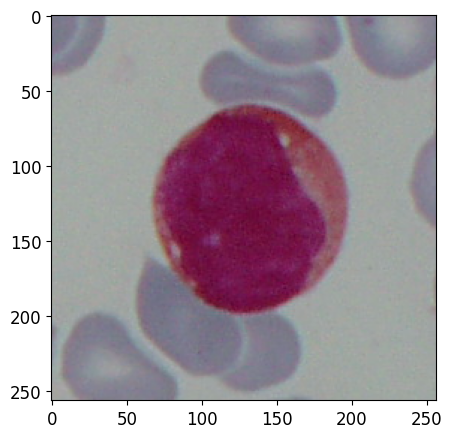

In [80]:
from matplotlib import pyplot as plt

# Plot test data as an image from the dataset uing imshow() function .
plt.imshow(image_color)
plt.show()

In [81]:
import os

# Return the current working directory using getcwd() method.
os.getcwd()

'/content'

In [82]:
# Get a list of all files the specified directory.
folders = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB')

# Get a list of all images the ALL_IDB1 dataset.
items_all_idb1 = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB1/ALL_IDB1/im')

# Get a list of all images the ALL_IDB2 dataset.
items_all_idb2 = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img')

print("ALL folders in the ALL_IDB Database:", folders)
print("ALL items in the ALL_IDB1 dataset:", items_all_idb1)
print("ALL items in the ALL_IDB2 dataset:", items_all_idb2)

ALL folders in the ALL_IDB Database: ['ALL_IDB1', 'ALL_IDB2']
ALL items in the ALL_IDB1 dataset: ['Im001_1.jpg', 'Im005_1.jpg', 'Im002_1.jpg', 'Im009_1.jpg', 'Im007_1.jpg', 'Im010_1.jpg', 'Im004_1.jpg', 'Im003_1.jpg', 'Im006_1.jpg', 'Im008_1.jpg', 'Im011_1.jpg', 'Im012_1.jpg', 'Im024_1.jpg', 'Im027_1.jpg', 'Im013_1.jpg', 'Im032_1.jpg', 'Im031_1.jpg', 'Im021_1.jpg', 'Im036_0.jpg', 'Im015_1.jpg', 'Im023_1.jpg', 'Im018_1.jpg', 'Im014_1.jpg', 'Im017_1.jpg', 'Im025_1.jpg', 'Im029_1.jpg', 'Im034_0.jpg', 'Im026_1.jpg', 'Im030_1.jpg', 'Im022_1.jpg', 'Im020_1.jpg', 'Im033_1.jpg', 'Im035_0.jpg', 'Im019_1.jpg', 'Im028_1.jpg', 'Im016_1.jpg', 'Im038_0.jpg', 'Im037_0.jpg', 'Im039_0.jpg', 'Im043_0.jpg', 'Im044_0.jpg', 'Im045_0.jpg', 'Im046_0.jpg', 'Im042_0.jpg', 'Im041_0.jpg', 'Im040_0.jpg', 'Im056_1.jpg', 'Im054_1.jpg', 'Im055_1.jpg', 'Im049_1.jpg', 'Im051_1.jpg', 'Im050_1.jpg', 'Im048_1.jpg', 'Im047_0.jpg', 'Im053_1.jpg', 'Im052_1.jpg', 'Im059_1.jpg', 'Im060_1.jpg', 'Im058_1.jpg', 'Im062_1.jpg', 'I

In [83]:
import re

# Create a list of images with ALL cells of the format ImXXX_1.tif.
ALL_images = []
for image in items_all_idb2:
        if re.search('[A-Za-z0-9]+_[1]+\.[A-Za-z0-9]+', image): 
                ALL_images.append(image)
print('Number of ALL cancer images:', len(ALL_images))

# Create a list of images with healthy cells of the format ImXXX_0.tif.
healthy_images = []
for image in items_all_idb2:
        if re.search('[A-Za-z0-9]+_[0]+\.[A-Za-z0-9]+', image): 
                healthy_images.append(image)
print('Number of healthy cell images:', len(healthy_images))

Number of ALL cancer images: 130
Number of healthy cell images: 130


In [84]:
import cv2
# Create a list of ALL resized and RGB images using the resize() and cvtColor() methods. 
ALL_list = []
ALL_labels = []
for each_image in ALL_images:
  if each_image.endswith(".tif"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    ALL_list.append(im_converted)
    label = int(full_path.split('_')[-1].split('.')[0])
    ALL_labels.append(label)

print('Number of ALL cancer images:', len(ALL_list))
print('Number of ALL labels:', len(ALL_labels))
print('ALL labels:', ALL_labels)

# Create a list of hea;thy resized and RGB images using the resize() and cvtColor() methods. 
healthy_list = []
healthy_labels = []
for each_image in healthy_images:
  if each_image.endswith(".tif"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    healthy_list.append(im_converted)
    label = int(full_path.split('_')[-1].split('.')[0])
    healthy_labels.append(label)

print('Number of healthy cell images:', len(healthy_list))
print('Number of healthy labels:', len(healthy_labels))
print('Healthy labels:', healthy_labels)

Number of ALL cancer images: 130
Number of ALL labels: 130
ALL labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Number of healthy cell images: 130
Number of healthy labels: 130
Healthy labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


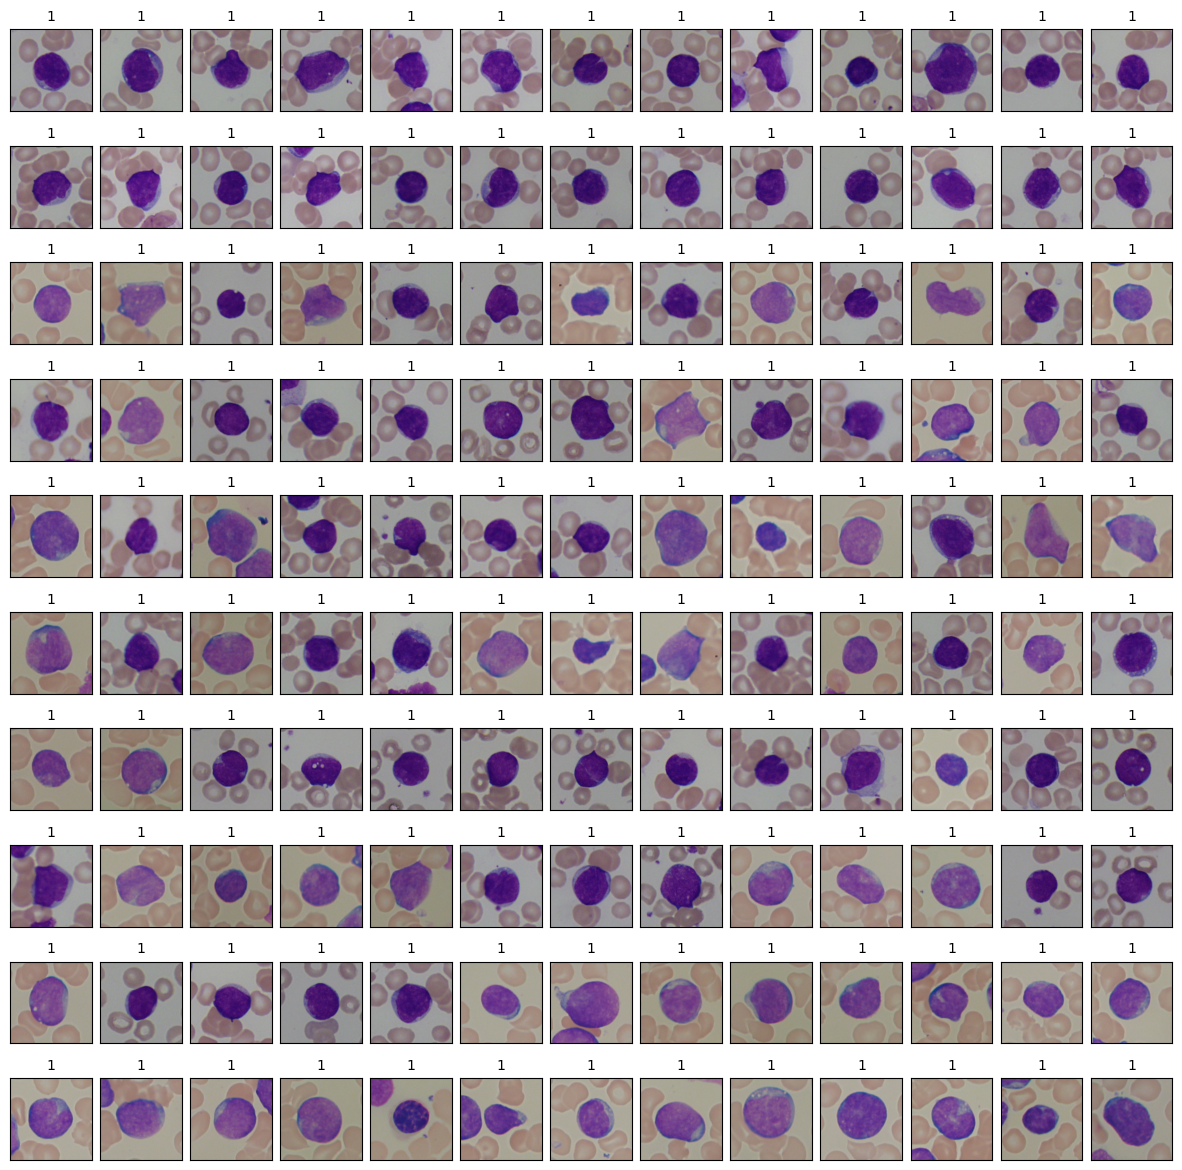

In [85]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(ALL_list, ALL_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

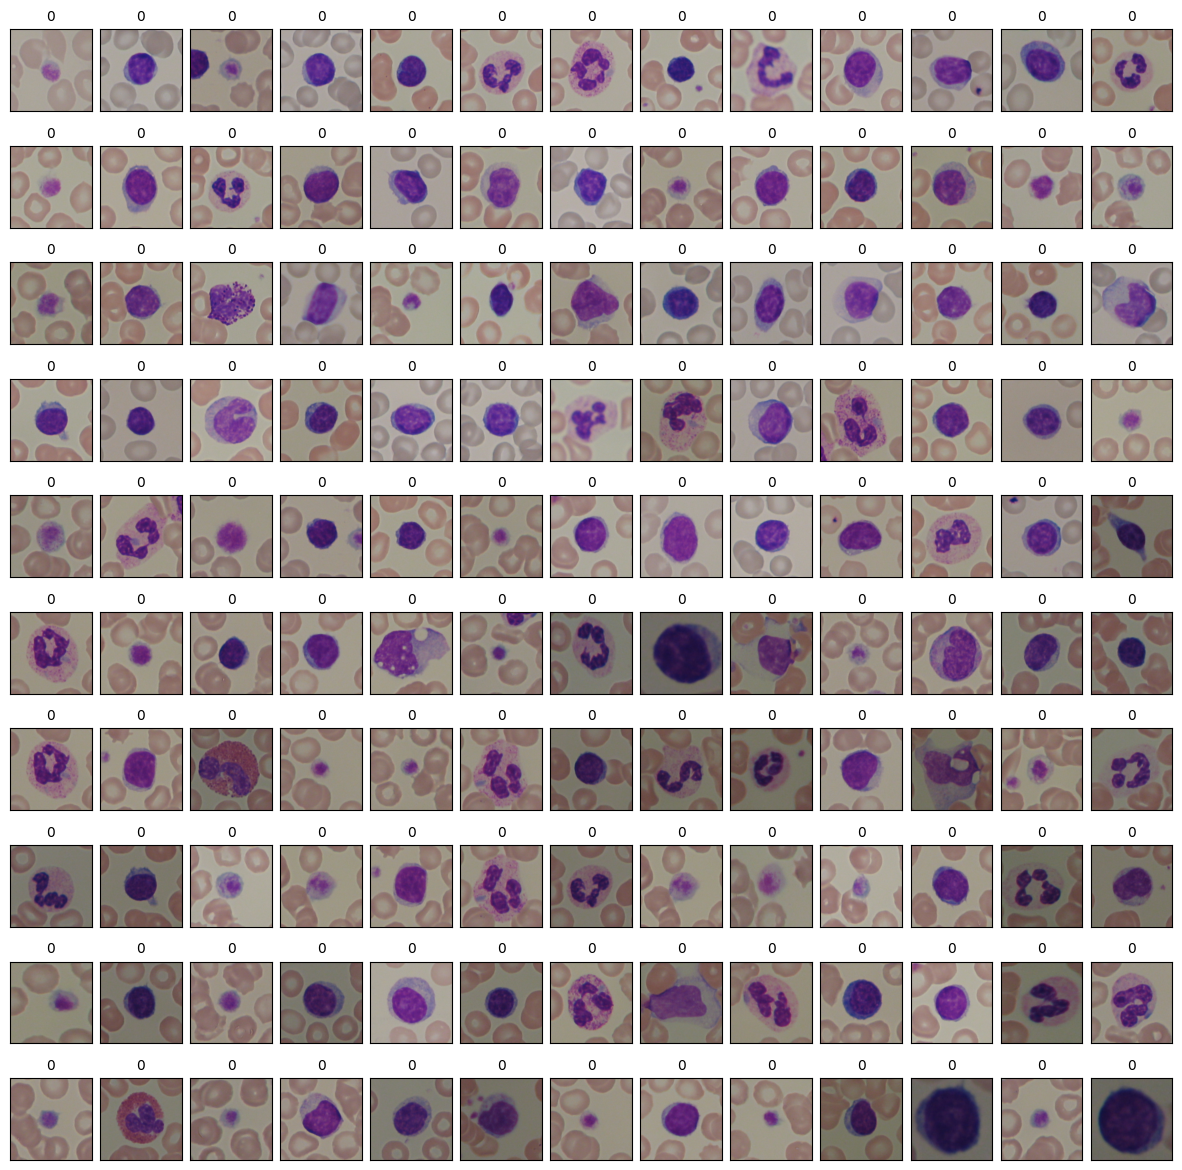

In [86]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(healthy_list, healthy_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

In [87]:
# Print the shape of the images in the ALL_list and healthy_list lists.
print("The Shape of the images in the ALL_list:", ALL_list[0].shape)
print("The Shape of the images in the list of healthy cells:", healthy_list[0].shape)

The Shape of the images in the ALL_list: (512, 512, 3)
The Shape of the images in the list of healthy cells: (512, 512, 3)


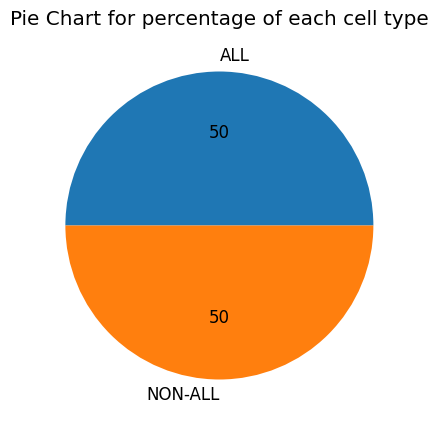

In [88]:
import pandas as pd
import numpy as np

# Get the percentage distribution of ALL and HEM cell images.  
cancer_dict = {"x_col":ALL_list, "y_col":[np.nan for x in range(len(ALL_list))]}
cancer_dict["y_col"] = "ALL"

normal_dict = {"x_col":healthy_list, "y_col":[np.nan for x in range(len(healthy_list))]}
normal_dict["y_col"] = "HEALTHY"


cancer_df = pd.DataFrame(cancer_dict)
normal_df = pd.DataFrame(normal_dict)

#train_df = cancer_df.append(normal_df, ignore_index=True)

plt.pie([len(ALL_list),len(healthy_list)],labels=["ALL","NON-ALL"],autopct='%.f')
plt.title('Pie Chart for percentage of each cell type')
plt.show()
     

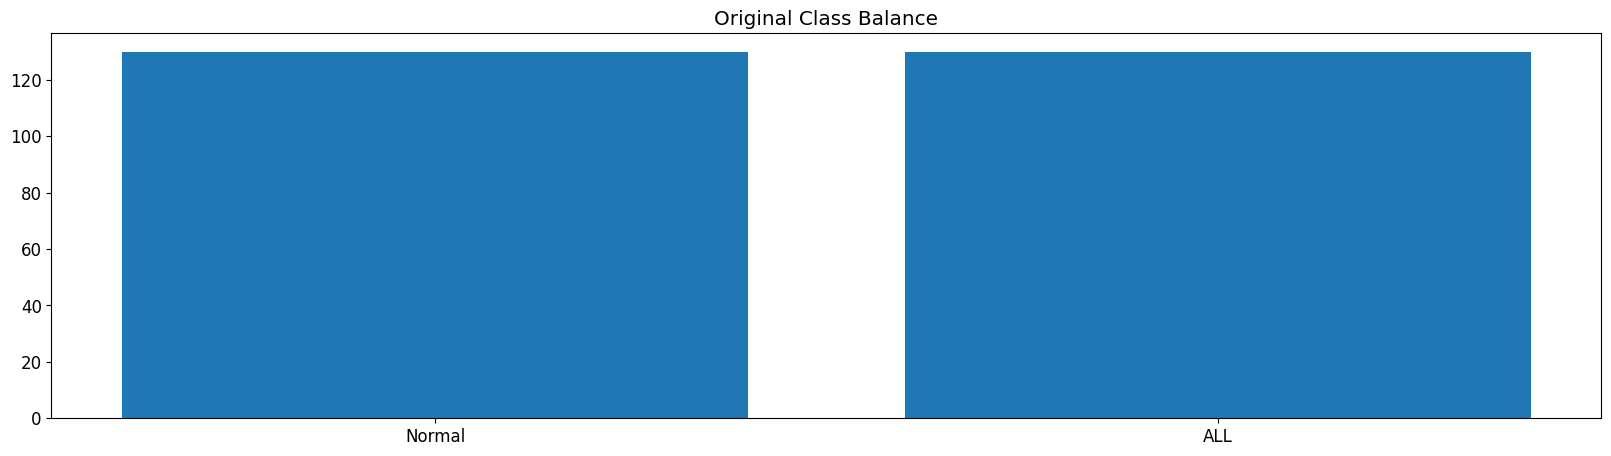

In [89]:
# Show the class balance of ALL and HEM images.
plt.bar(['Normal', 'ALL'], [len(healthy_list), len(ALL_list)])
plt.title('Original Class Balance')
plt.show()

In [90]:
import numpy as np
ALL_list = np.array(ALL_list)
ALL_labels = np.array(ALL_labels)
print("The Shape of the ALL images numpy array:", ALL_list.shape)
print("The Shape of the ALL labels numpy array:", ALL_labels.shape)

healthy_list = np.array(healthy_list)
healthy_labels = np.array(healthy_labels)
print("The Shape of the healthy images numpy array:", healthy_list.shape)
print("The Shape of the healthy labels numpy array:", healthy_labels.shape)

The Shape of the ALL images numpy array: (130, 512, 512, 3)
The Shape of the ALL labels numpy array: (130,)
The Shape of the healthy images numpy array: (130, 512, 512, 3)
The Shape of the healthy labels numpy array: (130,)


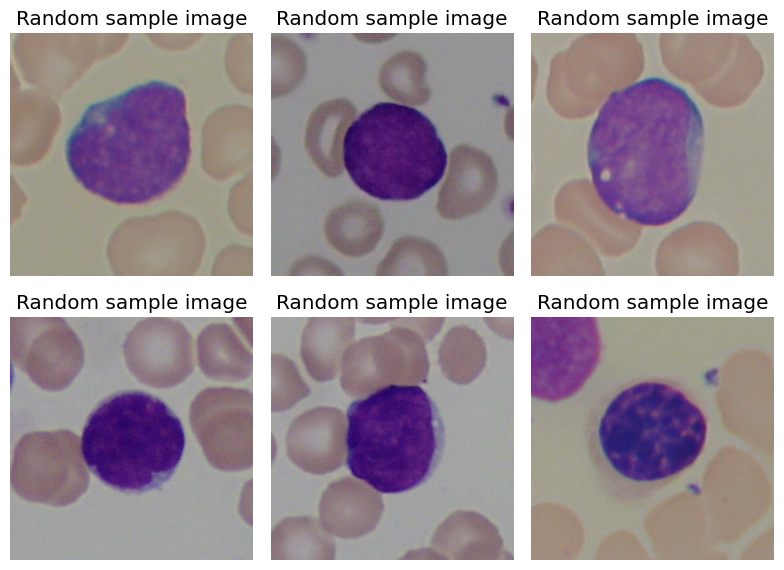

In [91]:
# concatenate both datasets and adjust to print random
import numpy as np

import matplotlib.pyplot as plt
import random

# Select 6 random images from dataset
num_images = 6
selected_images = np.random.choice(len(ALL_list), num_images, replace=False)

# Display selected images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    image = ALL_list[selected_images[i]]
    ax.imshow(image)
    ax.set_title('Random sample image')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [92]:
# # Normalize the pixel values in the cropped_images list to the range [0, 255] using cv2.normalize() function.
ALL_normalized_images = []
NON_ALL_normalized_images = []
for img in ALL_list:
    normalized_img = cv2.normalize(img, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    ALL_normalized_images.append(normalized_img)

for img in healthy_list:
    normalized_img = cv2.normalize(img, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    NON_ALL_normalized_images.append(normalized_img)

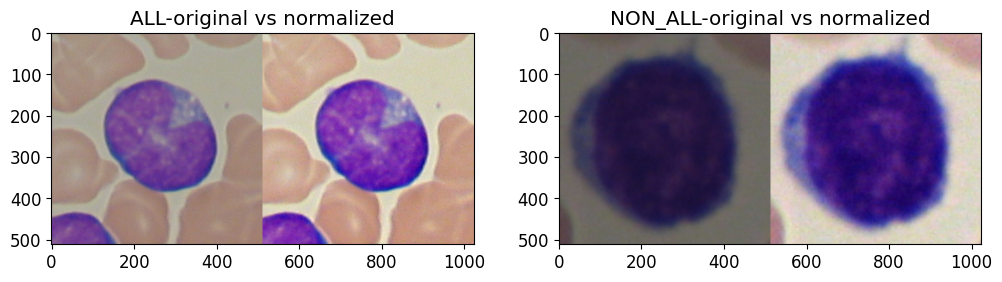

In [93]:
# Set the colormap for data display. 
gray = plt.cm.Greys_r

# Combine the original and normalised image.
combined_ALL = np.hstack((ALL_list[127], ALL_normalized_images[127]))
combined_NON_ALL = np.hstack((healthy_list[127], NON_ALL_normalized_images[127]))
# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 14))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the lightness image
ax[0].imshow(combined_ALL, cmap = gray)
ax[0].set_title('ALL-original vs normalized')

# Plot the a image.
ax[1].imshow(combined_NON_ALL, cmap = gray)
ax[1].set_title('NON_ALL-original vs normalized')
plt.show()

In [94]:
# add code for calculating the center

In [95]:
def split_channels(image):
    # Split the image into separate color channels.
    b_channel, g_channel, r_channel = cv2.split(image)

    # Print the minimum and maximum of red channel.
    print('Minimum value for red channel:', np.min(r_channel))
    print('Maximum value for red channel:', np.max(r_channel))

    # Print the minimum and maximum of green channel.
    print('Minimum value for green channel:', np.min(g_channel))
    print('Maximum value for green channel:', np.max(g_channel))

    # Print the minimum and maximum of blue channel.
    print('Minimum value for blue channel:', np.min(b_channel))
    print('Maximum value for blue channel:', np.max(b_channel))

    return r_channel, g_channel, b_channel

Minimum value for red channel: 107
Maximum value for red channel: 236
Minimum value for green channel: 0
Maximum value for green channel: 238
Minimum value for blue channel: 6
Maximum value for blue channel: 255


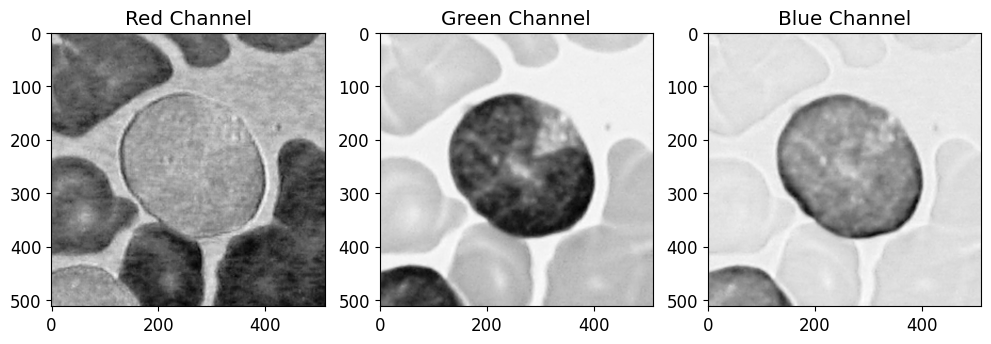

In [96]:
from google.colab.patches import cv2_imshow
r_channel, g_channel, b_channel = split_channels(ALL_normalized_images[127])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 14))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the lightness image
ax[0].imshow(r_channel, cmap = gray)
ax[0].set_title('Red Channel')

# Plot the a image.
ax[1].imshow(g_channel, cmap = gray)
ax[1].set_title('Green Channel')

# Plot the a image.
ax[2].imshow(b_channel, cmap = gray)
ax[2].set_title('Blue Channel')
plt.show()

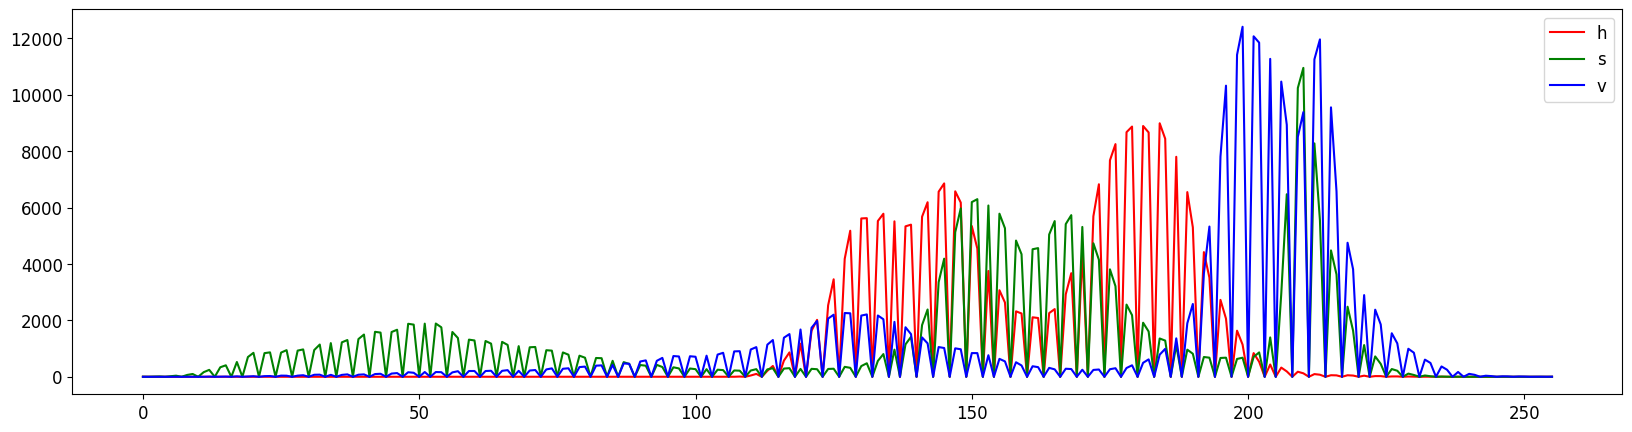

In [97]:
hist_h = cv2.calcHist([r_channel],[0],None,[256],[0,256])
hist_s = cv2.calcHist([g_channel],[0],None,[256],[0,256])
hist_v = cv2.calcHist([b_channel],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

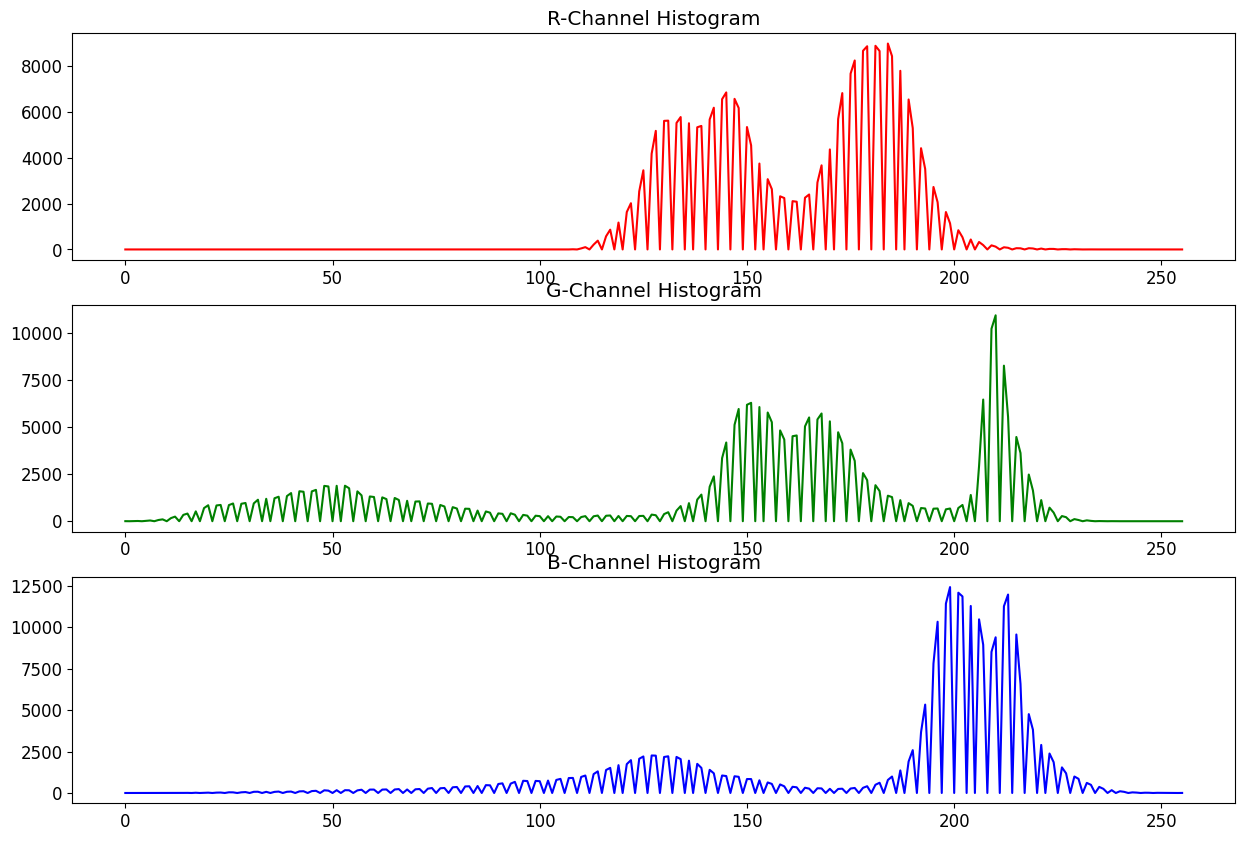

In [98]:
# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the first image
ax[0].plot(hist_h, color='r')
ax[0].set_title('R-Channel Histogram')

ax[1].plot(hist_s, color='g')
ax[1].set_title('G-Channel Histogram')

ax[2].plot(hist_v, color='b')
ax[2].set_title('B-Channel Histogram')
plt.show()

In [99]:
# Extract the green channel from all images in the normalized_images list.
# Apply Gaussian blur for smoothing to the green channels using GaussianBlur() function.
ALL_blurred_images = []
NON_ALL_blurred_images = []
kernel_size = (7, 7)
sigma_x = 0

for img in ALL_normalized_images:
    # Split the image into separate color channels
    b_channel, g_channel, r_channel = cv2.split(img)

    # Apply Gaussian blur to the green channel
    blurred_g_channel = cv2.GaussianBlur(g_channel, kernel_size, sigma_x)

    # Add the blurred image to the list of blurred images
    ALL_blurred_images.append(blurred_g_channel)

for img in NON_ALL_normalized_images:
    # Split the image into separate color channels
    b_channel, g_channel, r_channel = cv2.split(img)

    # Apply Gaussian blur to the green channel
    blurred_g_channel = cv2.GaussianBlur(g_channel, kernel_size, sigma_x)

    # Add the blurred image to the list of blurred images
    NON_ALL_blurred_images.append(blurred_g_channel)

In [100]:
# add Otsu algorithm implementation for a list of images

In [101]:
# add multiotsu for a list of images

In [102]:
# Initialize an empty list to store the threshold values
ALL_thresholds = []
NON_ALL_thresholds = []

# Loop through each image in blurred_images
for img in ALL_blurred_images:

    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Append the threshold value to the list
    ALL_thresholds.append(ret)

# Compute the mean threshold value
ALL_mean_threshold = np.mean(ALL_thresholds)
print("A list of all threshold values for blast images: ", ALL_thresholds)
# Print the mean threshold value
print("Mean Threshold for all blast Gaussian Blurred Green Channel images: ", ALL_mean_threshold)

# Loop through each image in blurred_images
for img in NON_ALL_blurred_images:

    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Append the threshold value to the list
    NON_ALL_thresholds.append(ret)

# Compute the mean threshold value
NON_ALL_mean_threshold = np.mean(NON_ALL_thresholds)
print("A list of all threshold values for healthy images: ", NON_ALL_thresholds)
# Print the mean threshold value
print("Mean Threshold for all healthy Gaussian Blurred Green Channel images: ", NON_ALL_mean_threshold)

A list of all threshold values for blast images:  [115.0, 129.0, 114.0, 121.0, 110.0, 116.0, 112.0, 110.0, 114.0, 113.0, 117.0, 113.0, 114.0, 108.0, 115.0, 111.0, 117.0, 117.0, 116.0, 121.0, 116.0, 117.0, 121.0, 121.0, 122.0, 117.0, 113.0, 131.0, 117.0, 106.0, 120.0, 118.0, 102.0, 116.0, 114.0, 115.0, 129.0, 110.0, 111.0, 124.0, 111.0, 120.0, 116.0, 116.0, 116.0, 111.0, 117.0, 121.0, 123.0, 131.0, 112.0, 118.0, 110.0, 122.0, 135.0, 109.0, 155.0, 114.0, 113.0, 114.0, 102.0, 124.0, 114.0, 114.0, 133.0, 126.0, 109.0, 117.0, 108.0, 129.0, 118.0, 107.0, 126.0, 107.0, 115.0, 114.0, 125.0, 120.0, 114.0, 103.0, 112.0, 117.0, 120.0, 110.0, 111.0, 112.0, 115.0, 115.0, 108.0, 107.0, 113.0, 112.0, 116.0, 104.0, 120.0, 111.0, 114.0, 113.0, 114.0, 122.0, 108.0, 128.0, 125.0, 115.0, 118.0, 118.0, 110.0, 119.0, 117.0, 123.0, 124.0, 123.0, 113.0, 111.0, 133.0, 114.0, 113.0, 124.0, 120.0, 117.0, 121.0, 118.0, 114.0, 116.0, 124.0, 122.0, 120.0, 115.0, 120.0, 118.0]
Mean Threshold for all blast Gaussian B

In [103]:
# Define a list to store the segmented images
ALL_segmented_images = []
NON_ALL_segmented_images = []

# Define a list to store the Canny edge images
ALL_edge_images = []
NON_ALL_edge_images = []

# Loop through each image in blurred_images
for img in ALL_blurred_images:

    # Apply the mean threshold to the image
    binary = cv2.threshold(img, ALL_mean_threshold, 255, cv2.THRESH_BINARY_INV)[1]

    # Append the segmented image to the list
    ALL_segmented_images.append(binary)

    # Find Canny edges of the thresholded image
    edges = cv2.Canny(binary, 70, 150)

    # Append the Canny edged image to the list
    ALL_edge_images.append(edges)


# Loop through each image in blurred_images
for img in NON_ALL_blurred_images:

    # Apply the mean threshold to the image
    binary = cv2.threshold(img, NON_ALL_mean_threshold, 255, cv2.THRESH_BINARY_INV)[1]

    # Append the segmented image to the list
    NON_ALL_segmented_images.append(binary)

    # Find Canny edges of the thresholded image
    edges = cv2.Canny(binary, 70, 150)

    # Append the Canny edged image to the list
    NON_ALL_edge_images.append(edges)

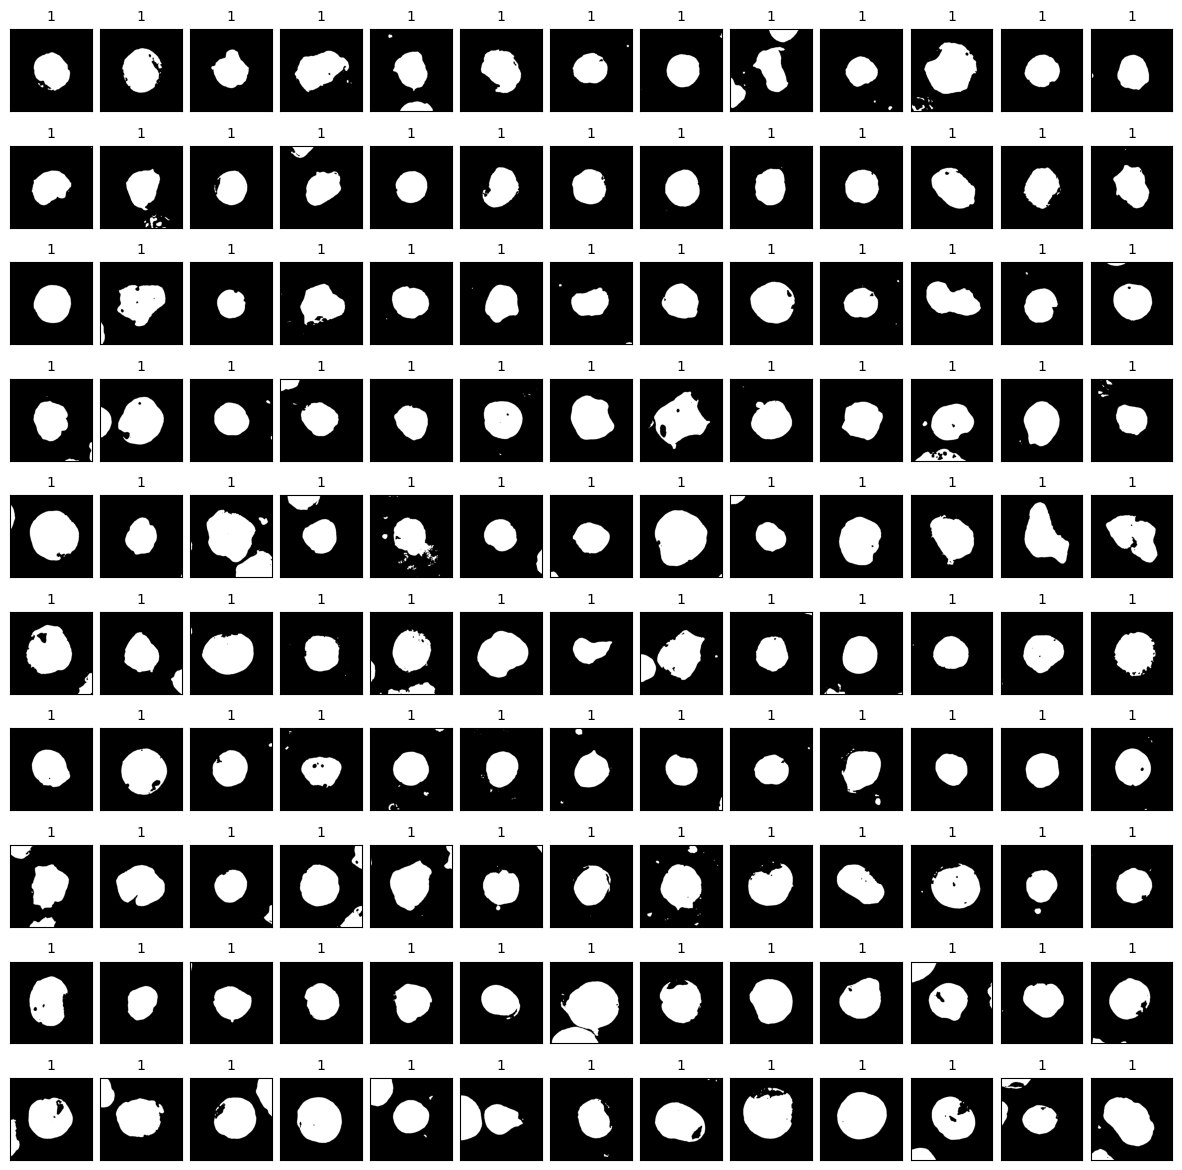

In [104]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(ALL_segmented_images, ALL_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

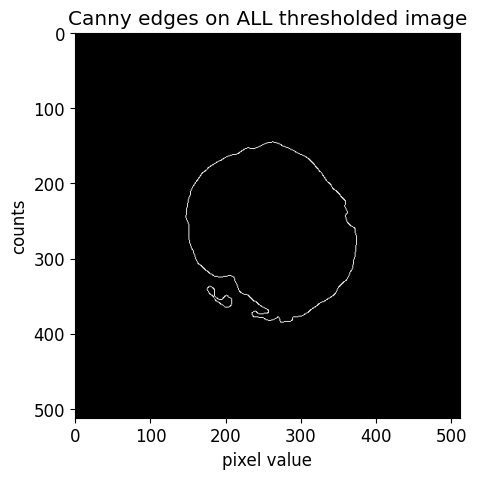

In [105]:
# Display Canny edges for otsu mean thresholded images.
plt.imshow(ALL_edge_images[0], cmap=gray)
plt.title("Canny edges on ALL thresholded image")
plt.xlabel("pixel value")
plt.ylabel("counts")
plt.show()

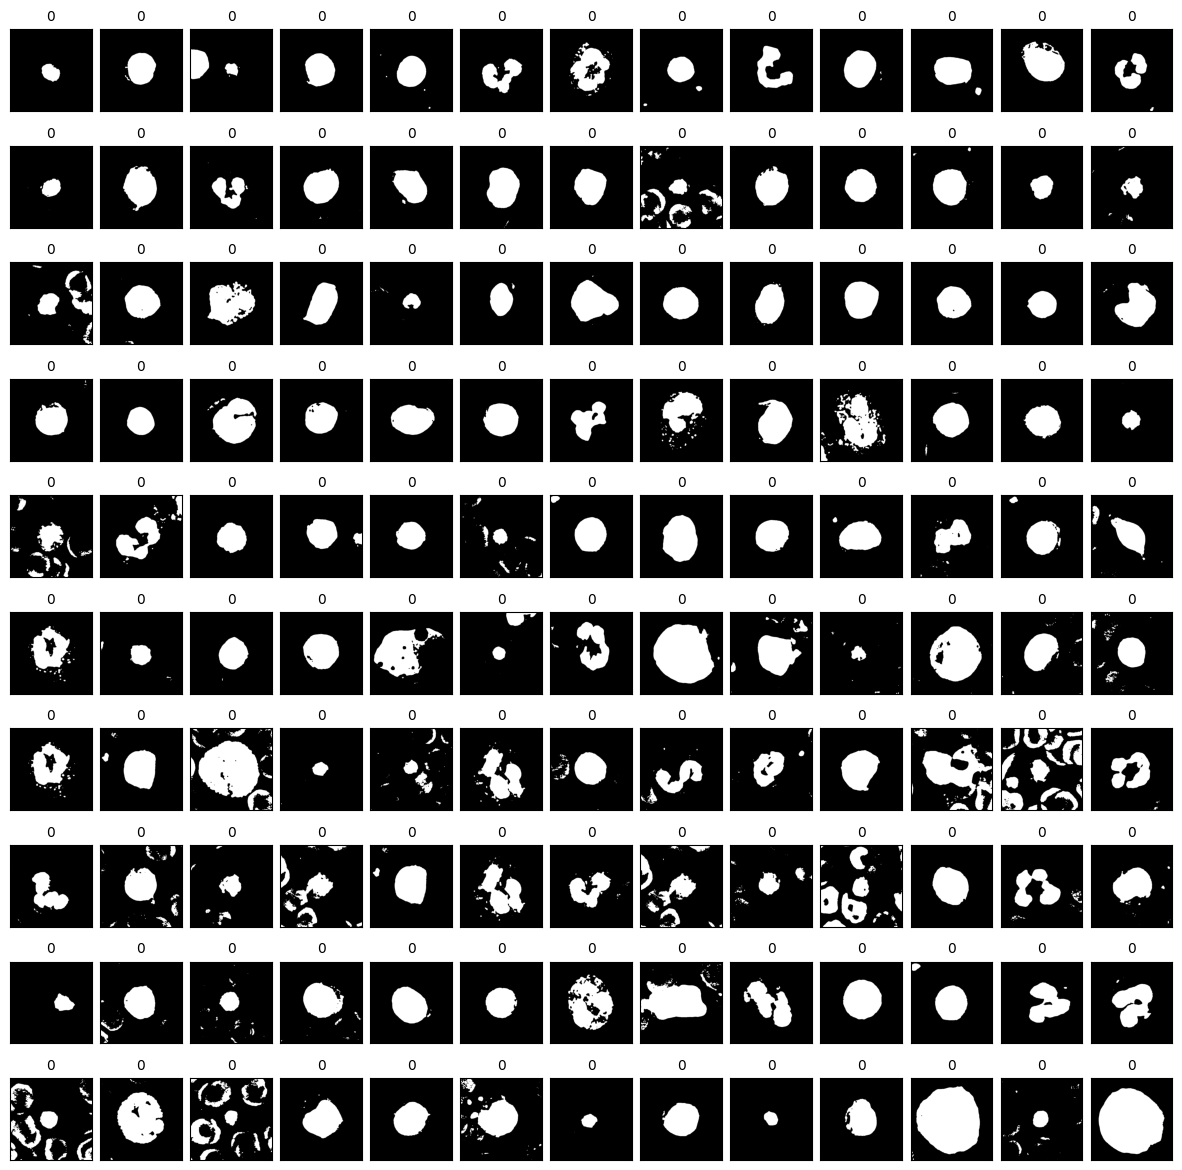

In [106]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(NON_ALL_segmented_images, healthy_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

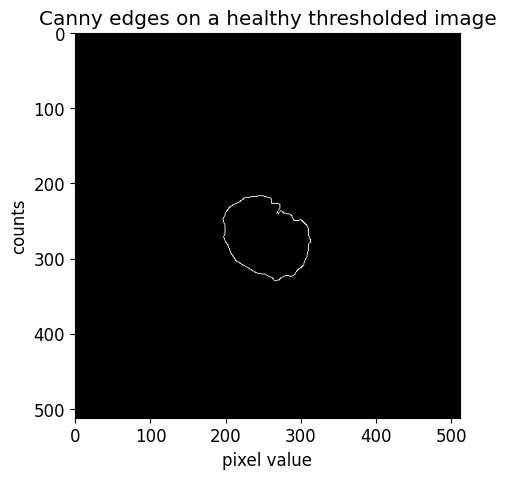

In [107]:
# Display Canny edges for otsu mean thresholded images.
plt.imshow(NON_ALL_edge_images[0], cmap=gray)
plt.title("Canny edges on a healthy thresholded image")
plt.xlabel("pixel value")
plt.ylabel("counts")
plt.show()

In [108]:
# Apply dilation to increase object area in the thresholded images to accentuate features in the image using dilate() function.
# Parameters:
#     src: the input image.
#     dst: output image of the same size and type as src.
#     element: structuring element used for dilation.  
#     iterations: number of times dilation is applied.

# Input image is the thresholded image.
# SE is a kernel/matrix with which image is convolved.
# The image will be dilated 1 time.

# Define a list to store the morphologically processed images
ALL_morph_images = []
NON_ALL_morph_images = []

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

# Apply dilation to each segmented image
for segmented_image in ALL_segmented_images:
    opening_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel, iterations=1)
    erode = cv2.erode(opening_image, kernel, iterations = 4)
    ALL_morph_images.append(erode)

# Apply dilation to each segmented image
for segmented_image in NON_ALL_segmented_images:
    opening_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel, iterations=1)
    erode = cv2.erode(opening_image, kernel, iterations = 5)
    NON_ALL_morph_images.append(erode)


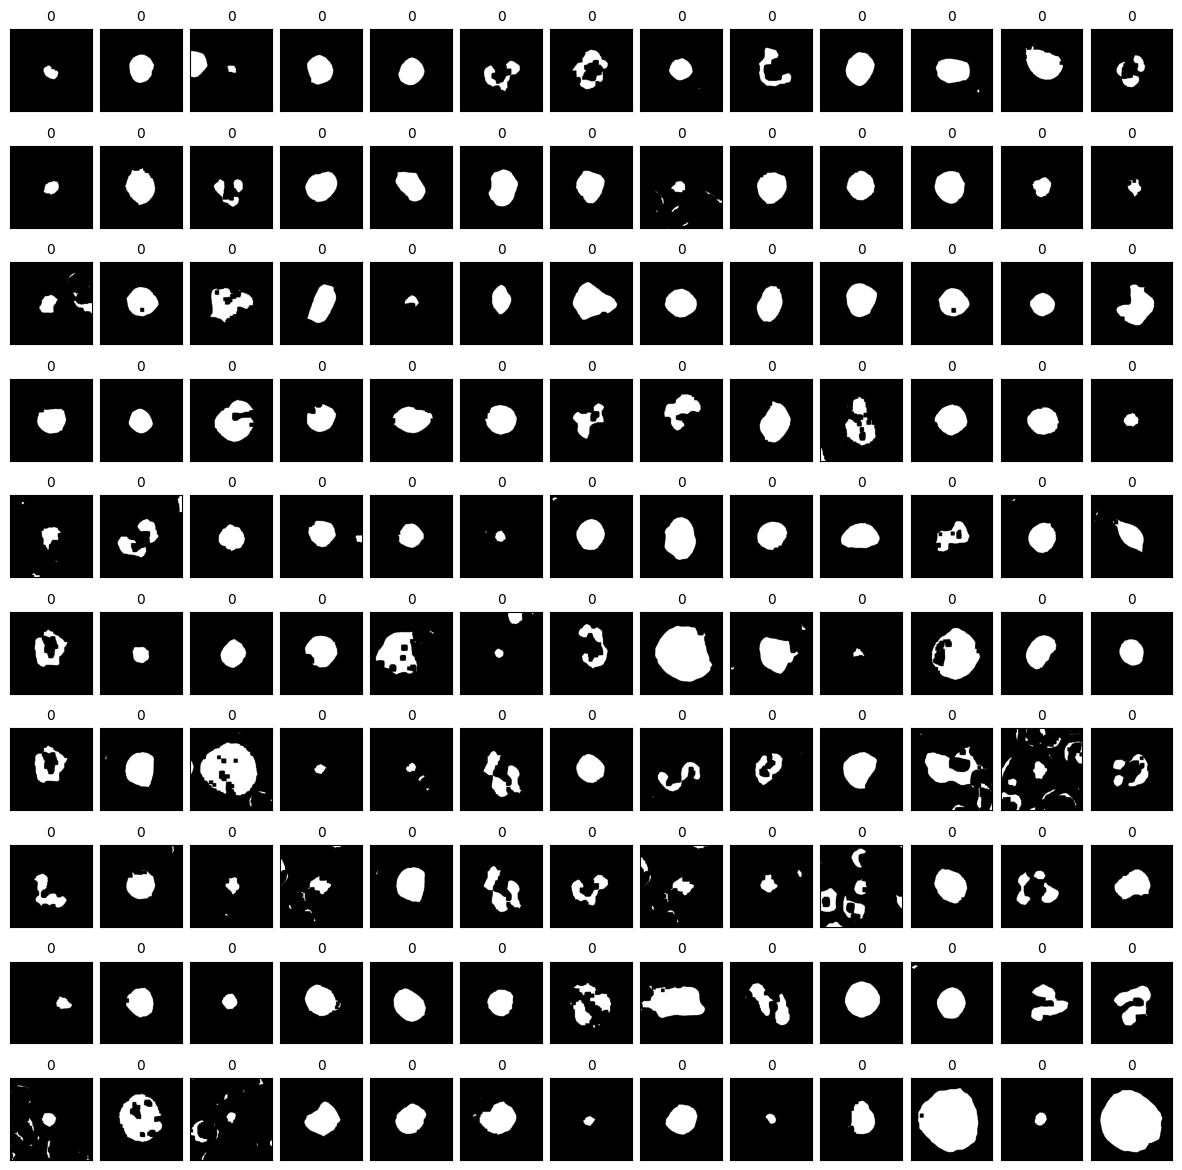

In [109]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(10, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(NON_ALL_morph_images, healthy_labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

In [110]:
# add 1 pixel white border all around
# top=1, bottom=1, left=1, right=1 mean that 1 pixel-wide border needs to be built
# value = 0 -> black
# top, bottom, left, right; bordertype; the value for the border pixels
# pad = cv2.copyMakeBorder(flooded_images[90], 1,1,1,1, cv2.BORDER_CONSTANT, value=255)
# height, width = pad.shape
# plt.imshow(pad, cmap = gray)
# print(height, width)

# border cleaning

# Define the padding parameters
top = bottom = left = right = 1

# Define the padding border type and value
border_type = cv2.BORDER_CONSTANT
border_value = 255

# Create an empty list to store the padded images
ALL_border_cleaned = []
NON_ALL_border_cleaned = []

# Iterate over each image in the list and pad it
for img in ALL_morph_images:
    # Pad the image
    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, border_type, value=border_value)
    
    # Create a zeros mask 2 pixels larger in each dimension
    height, width = padded_img.shape
    mask = np.zeros([height + 2, width + 2], np.uint8)

    # Set the flood fill starting point to be the bottom right corner
    # seed_point = (width - 2, height - 2)
    
    # Floodfill the outer white border with black
    img_floodfill = cv2.floodFill(padded_img, mask, seedPoint=(0,0), newVal=0, loDiff=50, upDiff=50, flags=8)[1]
    
    # Remove the border
    img_floodfill = img_floodfill[1:height-1, 1:width-1]

    # Append the padded image to the list
    ALL_border_cleaned.append(img_floodfill)

# Iterate over each image in the list and pad it
for img in NON_ALL_morph_images:
    # Pad the image
    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, border_type, value=border_value)
    
    # Create a zeros mask 2 pixels larger in each dimension
    height, width = padded_img.shape
    mask = np.zeros([height + 2, width + 2], np.uint8)

    # Set the flood fill starting point to be the bottom right corner
    # seed_point = (width - 2, height - 2)
    
    # Floodfill the outer white border with black
    img_floodfill = cv2.floodFill(padded_img, mask, seedPoint=(0,0), newVal=0, loDiff=50, upDiff=50, flags=8)[1]
    
    # Remove the border
    img_floodfill = img_floodfill[1:height-1, 1:width-1]

    # Append the padded image to the list
    NON_ALL_border_cleaned.append(img_floodfill)

In [111]:
# Define a list to store the flooded images
ALL_flooded_images = []
NON_ALL_flooded_images = []

# Apply floodFill to each opened image in the list
for border_cleaned in ALL_border_cleaned:

    # Copy the thresholded image.
    im_floodfill = border_cleaned.copy()

    # Mask used to flood filling.
    # The size needs to be 2 pixels than the image.
    h, w = border_cleaned.shape[:2]
    mask_fill = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask_fill, (0,0), 255)

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    flooded = border_cleaned | im_floodfill_inv

    # Append the floded image to the list
    ALL_flooded_images.append(flooded)

# Apply floodFill to each opened image in the list
for border_cleaned in NON_ALL_border_cleaned:

    # Copy the thresholded image.
    im_floodfill = border_cleaned.copy()

    # Mask used to flood filling.
    # The size needs to be 2 pixels than the image.
    h, w = border_cleaned.shape[:2]
    mask_fill = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask_fill, (0,0), 255)

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    flooded = border_cleaned | im_floodfill_inv

    # Append the floded image to the list
    NON_ALL_flooded_images.append(flooded)

In [112]:
normalized_images = np.concatenate((ALL_normalized_images, NON_ALL_normalized_images))
flooded_images = np.concatenate((ALL_flooded_images, NON_ALL_flooded_images))

print('Length of all normalized images:', len(normalized_images))
print('Length of all flooded images:', len(flooded_images))

labels = np.concatenate((ALL_labels, healthy_labels))
print('Length of all labels:', len(labels))

Length of all normalized images: 260
Length of all flooded images: 260
Length of all labels: 260


In [113]:
from numpy.ma.core import bitwise_and
# Use the mask to remove the background from the original image
# mask_inv = cv2.bitwise_not(im_out)
# cv2_imshow(mask_inv)
# result = cv2.bitwise_and(normalized_images[90], normalized_images[90], mask=img_floodfill)

# Create an empty list to store the results
bitwised_images = []

# Iterate over each image in the list and apply the bitwise and operation
for i in range(len(normalized_images)):
    # Create the mask by using the corresponding border_cleaned image
      mask = flooded_images[i]
      
      # Apply the bitwise and operation
      bitwised = cv2.bitwise_and(normalized_images[i], normalized_images[i], mask=mask)
    
      # Append the result to the list
      bitwised_images.append(bitwised)

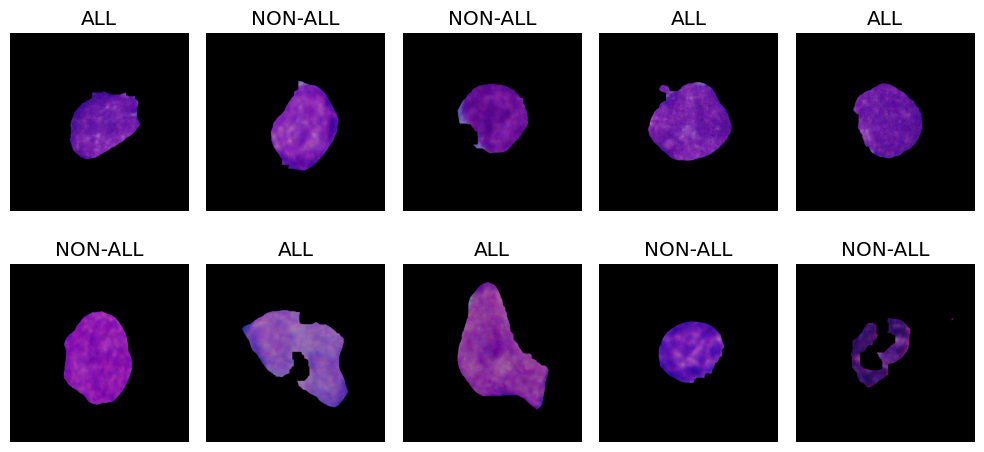

In [114]:
label_names = ['NON-ALL', 'ALL']

# Display 10 random samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(bitwised_images))
    ax.imshow(bitwised_images[idx], cmap='gray')
    ax.set_title(label_names[labels[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

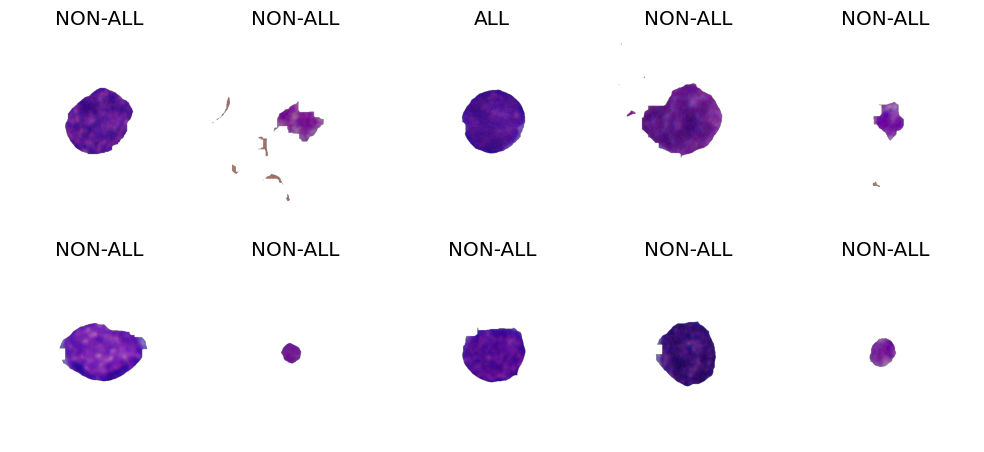

In [115]:
# Create an empty list to store the transparent images
transparent_images = []

# Iterate over each image in the list and apply the transparency mask
for i in range(len(bitwised_images)):
    # Convert the image to grayscale
    gray = cv2.cvtColor(bitwised_images[i], cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to the grayscale image
    _, alpha = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

    # Split the image into its color channels
    b, g, r = cv2.split(bitwised_images[i])

    # Merge the color channels with the alpha channel to create a transparent image
    rgba = [b, g, r, alpha]
    transparent_img = cv2.merge(rgba, 4)

    # Append the transparent image to the list
    transparent_images.append(transparent_img)



# Display 10 random samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(transparent_images))
    ax.imshow(transparent_images[idx], cmap='gray')
    ax.set_title(label_names[labels[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [116]:
cropped_images = []

for i in range(len(bitwised_images)):
    gray = cv2.cvtColor(bitwised_images[i], cv2.COLOR_BGR2GRAY)
    # gray = segmented[i].copy()
    contours, hierarchy = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    original_img_copy = normalized_images[i].copy()

    if len(contours) > 0:
        if len(contours) > 0 and len(contours) < 2:
            cv2.drawContours(original_img_copy, contours, contourIdx=-1, color=(255, 255, 0), thickness=2)
            x,y,w,h = cv2.boundingRect(contours[0])
            bounded_crop_img = original_img_copy[y:y+h, x:x+w]
            crop_img_not_center = bitwised_images[i][y:y+h, x:x+w]
            if crop_img_not_center.size != 0:
                cropped_images.append(crop_img_not_center)
        if len(contours) > 1:
            center = (gray.shape[1] // 2, gray.shape[0] // 2)
            min_dist = float('inf')
            center_contour = None
            for contour in contours:
                dist = cv2.pointPolygonTest(contour, center, True)
                if dist > 0 and dist < min_dist:
                    min_dist = dist
                    center_contour = contour
            if center_contour is not None:
                cv2.drawContours(original_img_copy, [center_contour], contourIdx=-1, color=(255, 255, 0), thickness=2)
                x, y, w, h = cv2.boundingRect(center_contour)
                cropped_img_center = bitwised_images[i][y:y+h, x:x+w]
                if cropped_img_center.size != 0:
                    cropped_images.append(cropped_img_center)
            else:                              
                contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
                # draw all three contours onto the blank image
                cv2.drawContours(original_img_copy, contours, contourIdx=-1, color=(255, 255, 0), thickness=2)
                # get the bounding box of the first contour
                x,y,w,h = cv2.boundingRect(np.vstack(contours))
                # crop the region of interest from the original image and the result image
                cropped_original = bitwised_images[i][y:y+h, x:x+w]
                cropped_result = bitwised_images[i][y:y+h, x:x+w]
                cropped_images.append(cropped_result)
print(len(cropped_images))

260


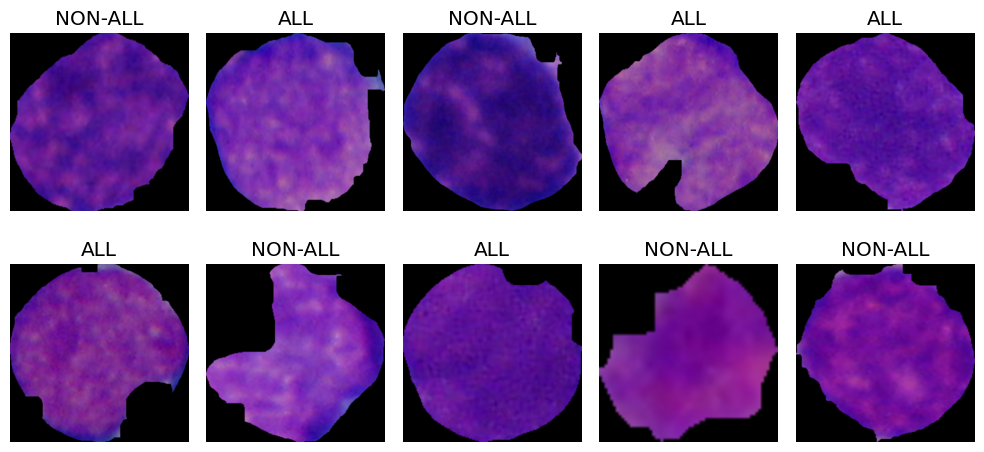

In [117]:
processed_images = []
for image in cropped_images:
    # Split the image into separate color channels
    im_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
    processed_images.append(im_resized)

# Display 10 random samples
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(processed_images))
    ax.imshow(processed_images[idx], cmap='gray')
    ax.set_title(label_names[labels[idx]])
    ax.axis('off')
plt.tight_layout()
plt.show()

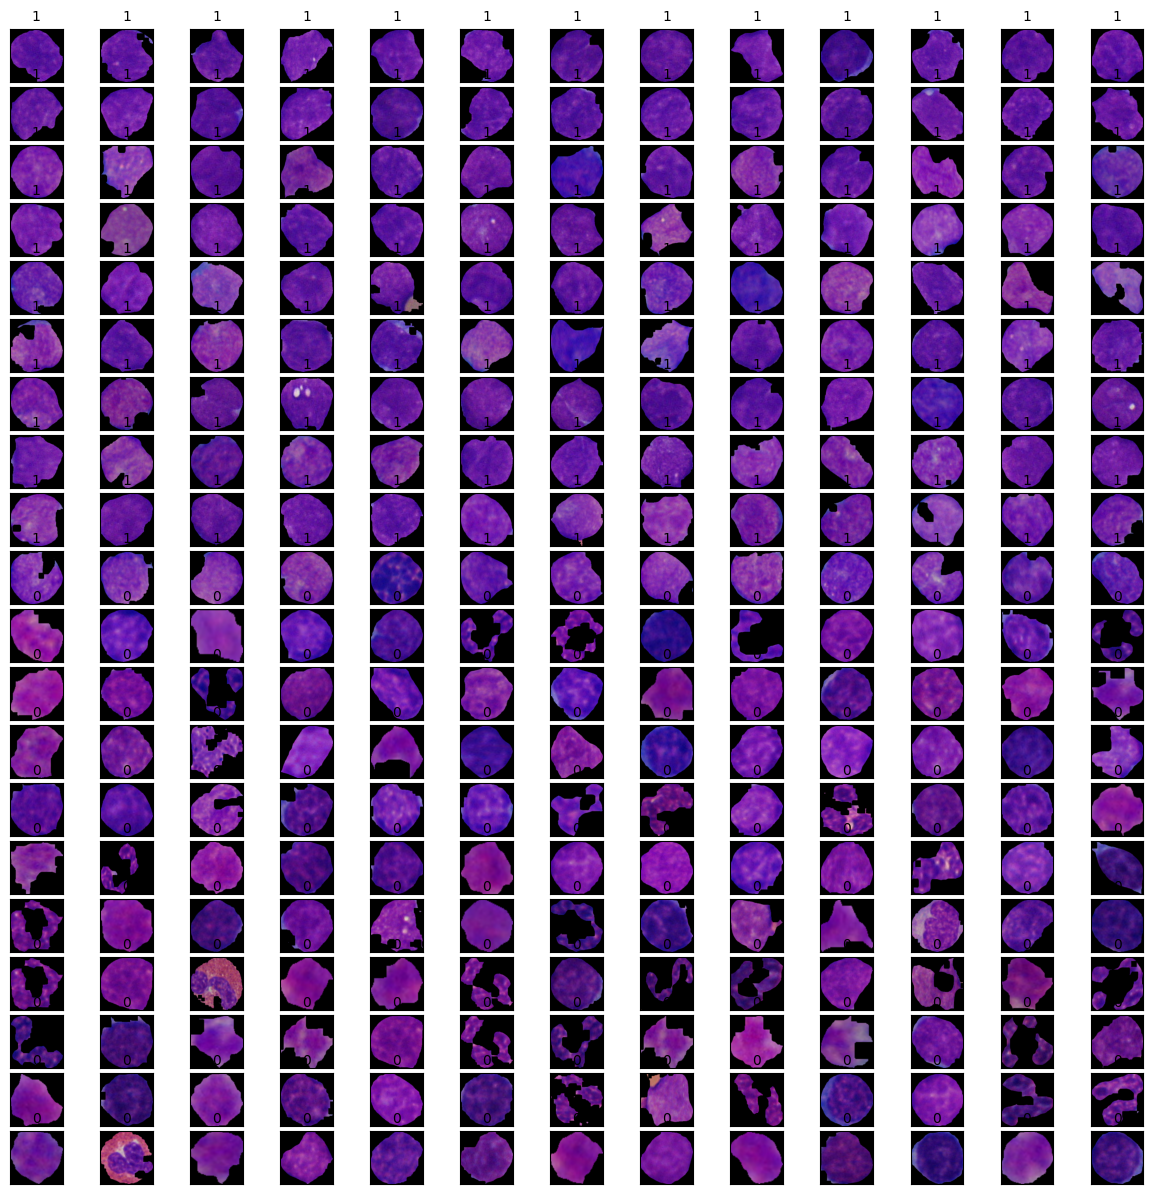

In [118]:
# Create a figure with 10 rows and 13 columns
fig, ax = plt.subplots(20, 13, figsize=(15, 15))

# Loop through the images and their corresponding numbers
for i, (image, number) in enumerate(zip(processed_images, labels)):
    # Calculate the row and column indices for the current image
    row = i // 13
    col = i % 13

    # Display the image on the corresponding subplot
    ax[row, col].imshow(image, cmap='gray')

    # Add the number as text above the image
    ax[row, col].set_title(number, fontsize=10)

    # Remove the ticks on the x and y axes
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()

In [119]:
print('Length of the pre-processed numpy array of images:', len(processed_images))
print('Shape of a sample pre-processed numpy array of images:', processed_images[3].shape)

Length of the pre-processed numpy array of images: 260
Shape of a sample pre-processed numpy array of images: (512, 512, 3)


In [120]:
# # Display the first 10 samples
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
# for i, ax in enumerate(axes.flat):
#     # idx = i  # Use the index i for first 10 images
#     idx = len(processed_images)-10+i # Use negative indexing to select the last 10 samples
#     ax.imshow(processed_images[idx], cmap='gray')
#     ax.set_title(label_names[labels[idx]])
#     ax.axis('off')
# plt.tight_layout()
# plt.show()

In [121]:
def extract_shape_features(img):
    # Convert to grayscale and find contours
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    retval, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # create an empty list to store the features
    shape_features = []
    
    # loop through all contours in the image
    for contour in contours:
        # Area
        area = cv2.contourArea(contour)

        # Eccentricity and elongation
        # calculate the eccentricity of the contour
        moments = cv2.moments(contour)
        hu = cv2.HuMoments(moments)
        ecc = np.sqrt(hu[1]**2 + hu[2]**2) / np.sqrt(hu[0]**2 + hu[3]**2)

        # calculate the elongation of the contour
        a = moments['mu20'] + moments['mu02']
        b = 4 * moments['mu11']**2 + (moments['mu20'] - moments['mu02'])**2
        elongation = (a + np.sqrt(b)) / (a - np.sqrt(b))

        # calculate the convex area of the contour
        hull = cv2.convexHull(contour)
        convex_area = cv2.contourArea(hull)

        # calculate the solidity of the contour
        solidity = area / convex_area

        # calculate the radius of the equivalent circle
        radius = np.sqrt(area / np.pi)

        # calculate the circularity of the contour
        perimeter = cv2.arcLength(contour, True)
        circularity = 4 * np.pi * area / perimeter**2

        # calculate the rectangularity of the bounding box
        x, y, w, h = cv2.boundingRect(contour)
        rectangularity = w / h

        # calculate the equivalent diameter of the contour
        eq_diameter = np.sqrt(4 * area / np.pi)

        # calculate the extent of the contour
        extent = area / (w * h)

        # calculate the orientation of the contour
        (x,y),(MA,ma),angle = cv2.fitEllipse(contour)
        orientation = angle

        # calculate the filled area of the contour
        mask = np.zeros(img.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [contour], -1, 255, -1)
        filled_area = cv2.countNonZero(mask)
        
         # calculate the major and minor axis lengths of the best-fit ellipse
        if contour.shape[0] >= 5:
            (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
            major_axis = max(MA, ma)
            minor_axis = min(MA, ma)
        else:
            # handle the case where the contour has less than 5 points
            # for example, set the major and minor axis lengths to zero
            major_axis = 0
            minor_axis = 0
        
        # append the features to the list
        shape_features.extend([area, ecc, elongation, convex_area, solidity, radius, circularity, rectangularity, eq_diameter, extent, orientation, filled_area, major_axis, minor_axis])

        return shape_features

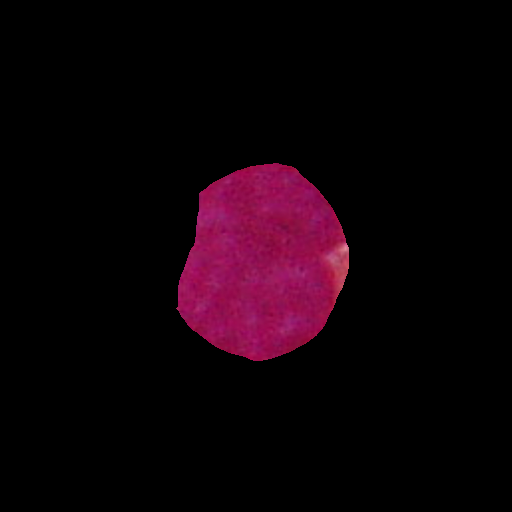

In [122]:
# Load example image
img = bitwised_images[15].copy()
# display image
cv2_imshow(img)

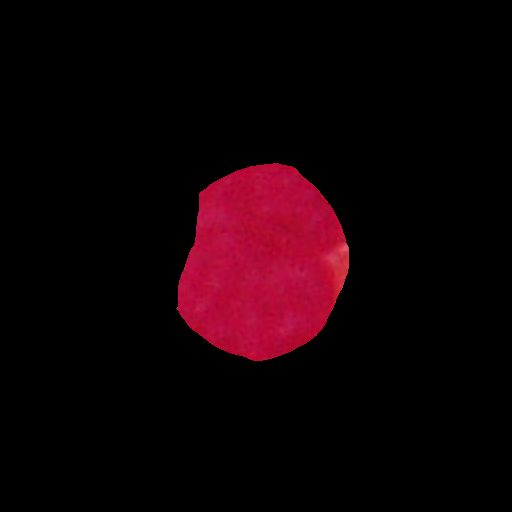

In [123]:
import cv2
import numpy as np

# Load example image
img = bitwised_images[15].copy()

# extract shape features
shape_features = extract_shape_features(img)

# get the contour
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv2.contourArea)

# fill in the area with red color
mask = np.zeros_like(img)
cv2.fillPoly(mask, [contour], (0, 0, 255))
result = cv2.addWeighted(img, 0.7, mask, 0.3, 0)

# display image
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

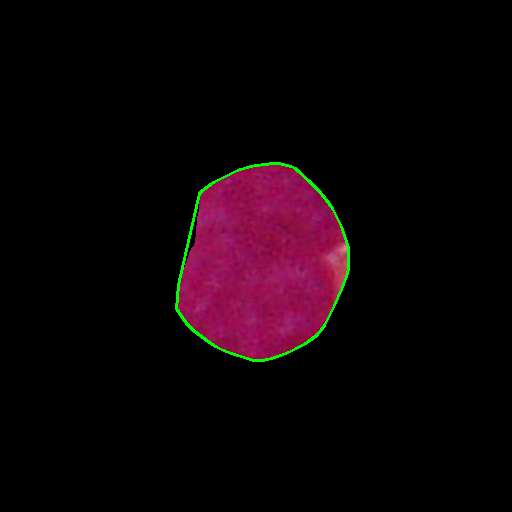

In [124]:
img = bitwised_images[15].copy()
# get the contour from the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# draw the convex hull
hull = cv2.convexHull(contour)
cv2.drawContours(img, [hull], 0, (0, 255, 0), 2)

# display image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

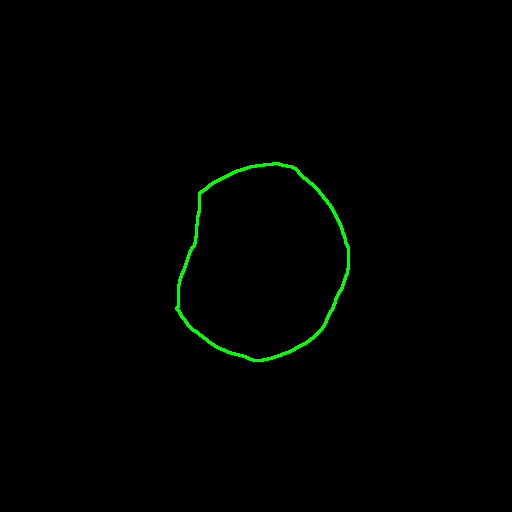

In [125]:
img = bitwised_images[15].copy()
# get the contour from the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)
area = cv2.contourArea(contour)
# calculate the circularity of the contour
perimeter = cv2.arcLength(contour, True)
circularity = 4 * np.pi * area / perimeter**2

# draw a contour around the perimeter of the object
contour_image = np.zeros_like(img)
cv2.drawContours(contour_image, [contour], 0, (0, 255, 0), 2)
cv2_imshow(contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

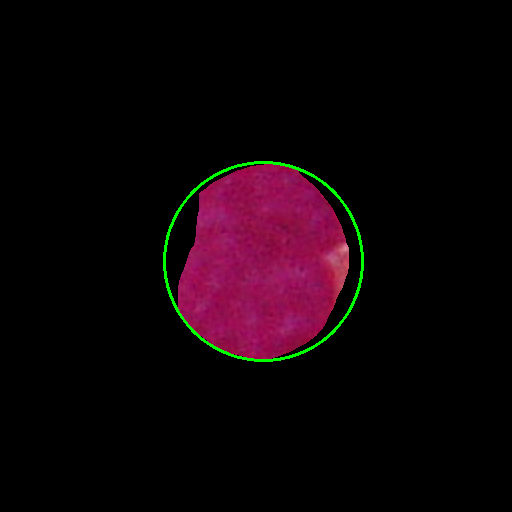

In [126]:
img = bitwised_images[15].copy()
# get the contour from the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)

# calculate the circularity of the contour
area = cv2.contourArea(contour)
perimeter = cv2.arcLength(contour, True)
circularity = 4 * np.pi * area / perimeter**2

# draw a circle around the object
center, radius = cv2.minEnclosingCircle(contour)
cv2.circle(img, (int(center[0]), int(center[1])), int(radius), (0, 255, 0), 2)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [127]:
  from scipy.stats import skew, kurtosis

  def calculate_histogram_texture_features_gray(img, n_bins=256, n_subregions=4):

      hist_gray_features = []
      # Convert the image to grayscale
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      # Determine the dimensions of the image and the size of the sub-regions
      img_height, img_width = img_gray.shape
      subregion_height = img_height // n_subregions
      subregion_width = img_width // n_subregions
      
      # Loop over the sub-regions
      for i in range(n_subregions):
          for j in range(n_subregions):
              # Compute the indices of the current sub-region
              x_start = i * subregion_height
              x_end = (i + 1) * subregion_height
              y_start = j * subregion_width
              y_end = (j + 1) * subregion_width
              
              # Extract the current sub-region from the image
              subregion = img_gray[x_start:x_end, y_start:y_end]
              
              # Compute the histogram of the sub-region
              hist = cv2.calcHist([subregion], [0], None, [n_bins], [0, 256])
              hist = cv2.normalize(hist, hist).flatten()
              
              # Compute the mean and standard deviation of the sub-region
              mean = np.mean(subregion)
              std_dev = np.std(subregion)
              
              # Compute the energy and entropy of the sub-region
              energy = np.sum(hist ** 2)
              entropy = -np.sum(np.where(hist != 0, hist * np.log2(hist + 1e-10), 0))
              
              # Compute the skewness and kurtosis of the sub-region
              skewness = skew(subregion.flatten())
              kurt = kurtosis(subregion.flatten())

              # Concatenate the features into a feature vector
              # features = np.array([mean, std_dev, energy, entropy, skewness, kurt])

              # Add the feature vector to the list of features
              hist_gray_features.extend([mean, std_dev, energy, entropy, skewness, kurt])
    
      return hist_gray_features

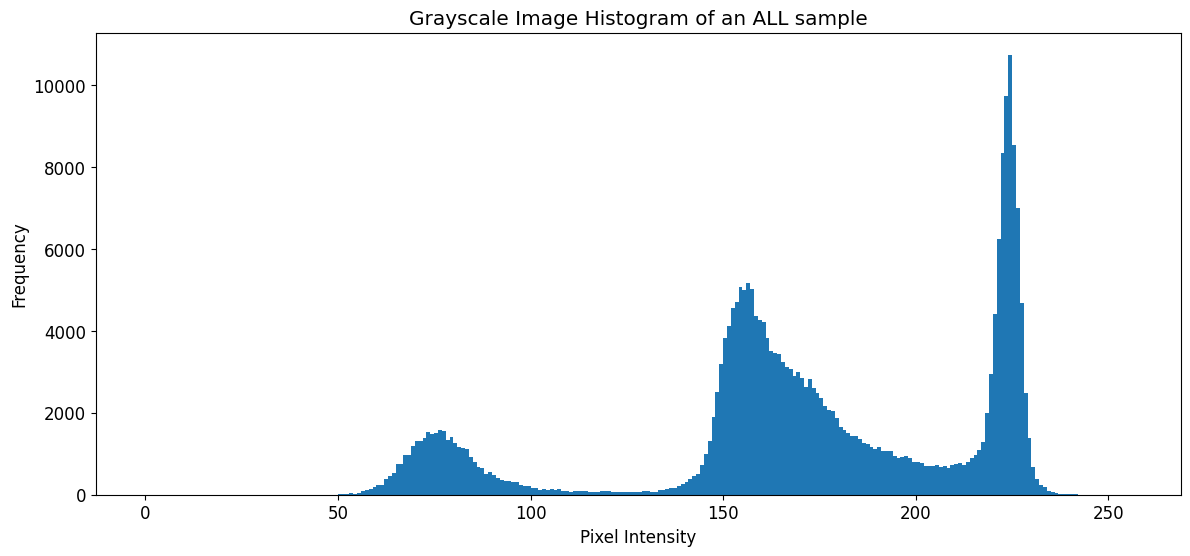

In [128]:
img = ALL_normalized_images[13].copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Calculate the histogram of the image
hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])

plt.figure(figsize=(14, 6))
# Plot the histogram
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.title('Grayscale Image Histogram of an ALL sample')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

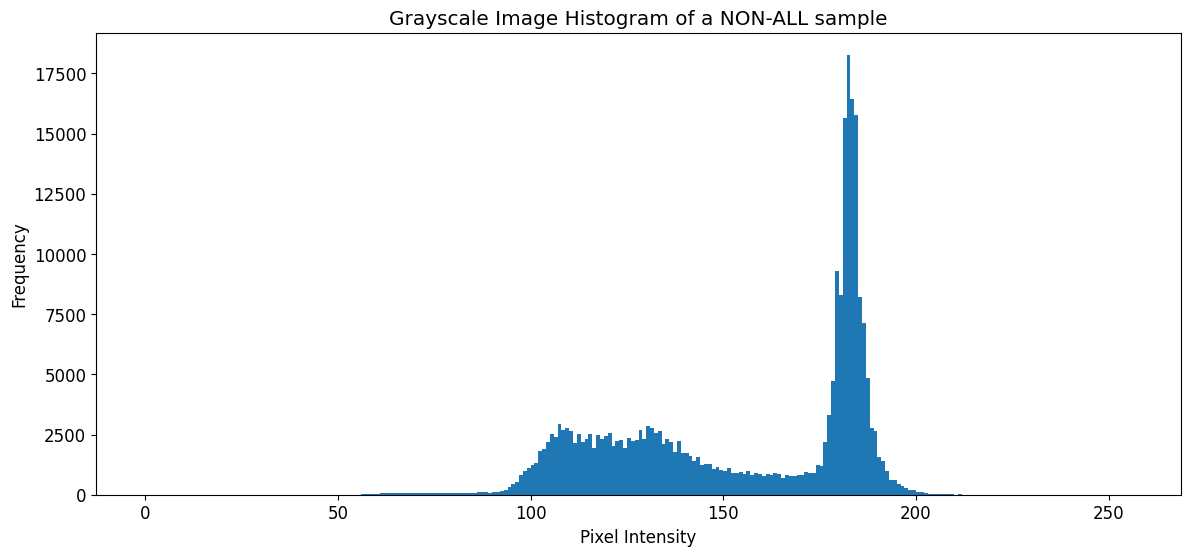

In [129]:
img = NON_ALL_normalized_images[100].copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Calculate the histogram of the image
hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256])

plt.figure(figsize=(14, 6))
# Plot the histogram
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.title('Grayscale Image Histogram of a NON-ALL sample')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [130]:
from skimage.feature import graycomatrix, graycoprops


def compute_texture_features(img):

    # Set the parameters for GLCM computation
    dist = [1]
    angle = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    levels = 256
    symmetric = True

    # Initialize list to store texture features
    texture_features = []

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Compute the GLCM matrix
    glcm = graycomatrix(img_gray, dist, angle, levels, symmetric=symmetric)

    
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    autocorrelation = np.sum(glcm**2)
    
    # flattened_glcm = glcm.reshape(glcm.shape[0], glcm.shape[1])

    # cluster_shade = np.sum(((np.arange(levels) - np.sum(flattened_glcm)*np.ones(levels))**3)*flattened_glcm)
    # cluster_prominence = np.sum(((np.arange(levels) - np.sum(flattened_glcm)*np.ones(levels))**4)*flattened_glcm)
    max_probability = np.max(glcm)

    # Combine the features into a list
    texture_features.extend([contrast, energy, homogeneity, entropy, correlation, asm, dissimilarity, autocorrelation, max_probability])

    return texture_features

In [131]:
from skimage.filters import gabor

def calculate_tamura_features(img):
    tamura_features = []

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Compute the co-occurrence matrix
    glcm = graycomatrix(img_gray, [5], [0], 256, symmetric=True, normed=True)

    # Compute the coarseness feature
    coarseness = np.log2(1 + np.max(img_gray) - np.min(img_gray)) / np.log2(1 + img_gray.shape[0])
    
    # coarseness = np.var(cv2.filter2D(img_gray, -1, np.ones((3,3))/9))

    # Compute the contrast feature
    contrast = graycoprops(glcm, 'contrast')[0, 0]


    # Compute the directionality features
    max_orientation = None
    max_variance = -1
    for orientation in range(4):
        # Create Gabor filter and filter the image
        gabor_img = np.real(gabor(img_gray, frequency=0.6, theta=orientation*np.pi/4)[0])

        # Compute the variance of the filtered image
        variance = np.var(gabor_img)

        # Update max variance and max orientation if necessary
        if variance > max_variance:
            max_variance = variance
            max_orientation = orientation

    # Compute the directionality feature
    directionality = max_orientation * (180 / 4)

    # Add the computed features to the list
    tamura_features.extend([coarseness, contrast, directionality])

    # Create a Pandas DataFrame from the list of features
    # tamura_df = pd.DataFrame(tamura_features, columns=['Coarseness', 'Contrast', 'Directionality'])

    return tamura_features

In [132]:
from scipy.stats import skew, kurtosis

def calculate_histogram_texture_features_rgb(img, n_bins=256, n_subregions=4):
    # Split the image into color channels
    b, g, r = cv2.split(img)
    channels = [b, g, r]

    # Initialize a list to store the texture features for each channel
    texture_features = []

    # Loop over each color channel
    for channel in channels:
        # Determine the dimensions of the image and the size of the sub-regions
        img_height, img_width = channel.shape
        subregion_height = img_height // n_subregions
        subregion_width = img_width // n_subregions

        # Loop over the sub-regions
        for i in range(n_subregions):
            for j in range(n_subregions):
                # Compute the indices of the current sub-region
                x_start = i * subregion_height
                x_end = (i + 1) * subregion_height
                y_start = j * subregion_width
                y_end = (j + 1) * subregion_width

                # Extract the current sub-region from the channel
                subregion = channel[x_start:x_end, y_start:y_end]

                # Compute the histogram of the sub-region
                hist = cv2.calcHist([subregion], [0], None, [n_bins], [0, 256])
                hist = cv2.normalize(hist, hist).flatten()

                # Compute the mean and standard deviation of the sub-region
                mean = np.mean(subregion)
                std_dev = np.std(subregion)

                # Compute the energy and entropy of the sub-region
                energy = np.sum(hist ** 2)
                entropy = -np.sum(np.where(hist != 0, hist * np.log2(hist + 1e-10), 0))

                # Compute the skewness and kurtosis of the sub-region
                skewness = skew(subregion.flatten())
                kurt = kurtosis(subregion.flatten())

                # Concatenate the features into a feature vector
                # features = np.array([mean, std_dev, energy, entropy, skewness, kurt])

                # Add the feature vector to the list of features
                texture_features.extend([mean, std_dev, energy, entropy, skewness, kurt])

    return texture_features

In [133]:
from skimage.feature import hog
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

shape_features_list = []
hist_gray_features_list = []
color_features_list = []
tamura_features_list = []
texture_features_list = []
fused_features_list = []

for image in processed_images:

    shape_feature = extract_shape_features(image)

    hist_gray_feature = calculate_histogram_texture_features_gray(image)

    color_feature = calculate_histogram_texture_features_rgb(image)

    tamura_feature = calculate_tamura_features(image)

    texture_feature = compute_texture_features(image)

    shape_features_list.append(shape_feature)
    hist_gray_features_list.append(hist_gray_feature)
    color_features_list.append(color_feature)
    tamura_features_list.append(tamura_feature)
    texture_features_list.append(texture_feature)


In [134]:
fused_features_list = []
for i in range(len(processed_images)):
    fused_feature_vector = np.concatenate((shape_features_list[i], hist_gray_features_list[i], color_features_list[i], tamura_features_list[i], texture_features_list[i]))
    fused_features_list.append(fused_feature_vector)
fused_features = np.array(fused_features_list)
print(len(fused_features))

260


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [135]:
test_image = processed_images[10]

shape_feature = calculate_histogram_texture_features_gray(test_image)
features = np.array(shape_feature)
print(features.shape)

(96,)


In [136]:
# Convert the feature list to a numpy array
all_features = np.array(fused_features)
all_features.shape

(260, 410)

In [137]:
df = pd.DataFrame(all_features)

all = df.dropna(axis=1)

all_features = all.values
all_features.shape

(260, 306)

In [138]:
from sklearn.feature_selection import VarianceThreshold

# remove constant and zero-variance features
selector = VarianceThreshold(threshold=0.0)
cleaned_features = selector.fit_transform(all_features)
cleaned_features.shape

(260, 306)

In [139]:
from sklearn.impute import SimpleImputer

# Replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')
clean_features = imputer.fit_transform(cleaned_features)
cleaned_features.shape

(260, 306)

In [140]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [141]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection


# initialize Naive Bayes classifier
clf = GaussianNB()

# initialize Sequential Forward Selection
sfs = SFS(clf,
          k_features=(1, all_features.shape[1]), 
          forward=True, 
          floating=False, 
          verbose=2,
          scoring='accuracy',
          cv=10)

In [142]:
# fit SFS to the data
sfs = sfs.fit(all_features, labels)

# get the selected features and their indices
selected_features = sfs.k_feature_idx_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    4.6s finished

[2023-04-01 09:46:10] Features: 1/306 -- score: 0.8346153846153846[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 305 out of 305 | elapsed:    5.8s finished

[2023-04-01 09:46:16] Features: 2/306 -- score: 0.853846153846154[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    4.8s finished

[2023-04-01 09:46:21] Features: 3/306 -- score: 0.8730769230769232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [143]:
print("Selected features: ", selected_features)

Selected features:  (31, 109, 166, 205, 296, 299)


Cross-validation scores:  [0.88461538 1.         0.88461538 0.88461538 0.88461538 0.88461538
 0.84615385 0.92307692 0.84615385 0.84615385]
Mean accuracy:  0.8884615384615385


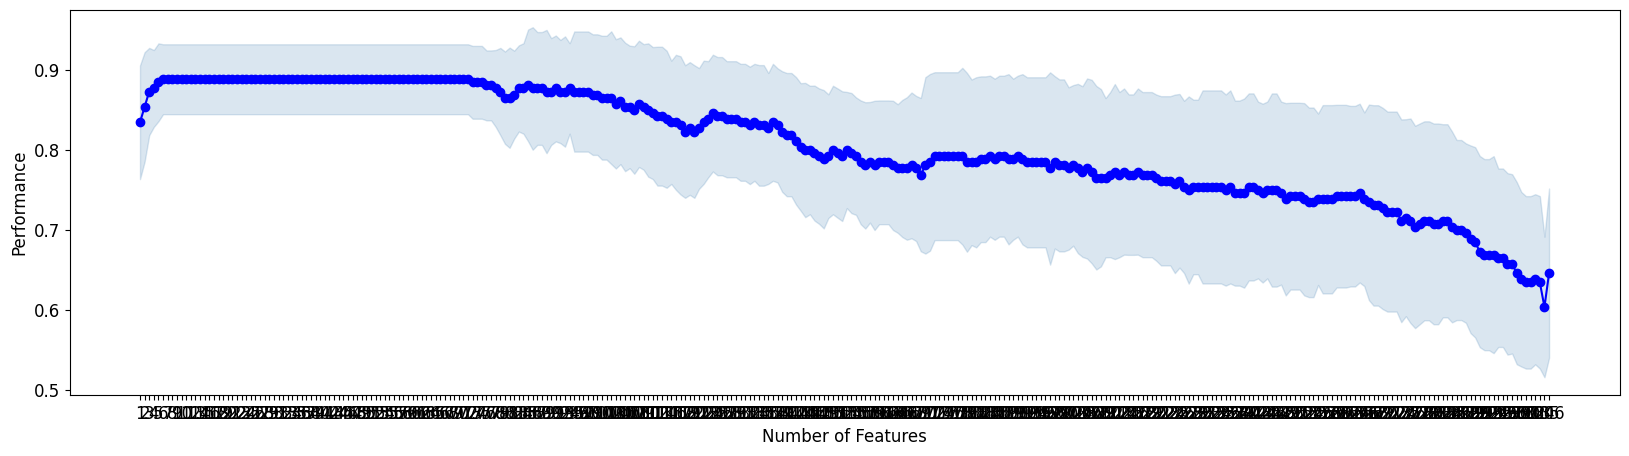

In [144]:
# plot the performance of the selected feature subsets
fig1 = plot_sequential_feature_selection(sfs.get_metric_dict(), kind='std_dev')

# adjust plot settings
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams.update({'font.size': 12})

# evaluate the performance of the selected feature subsets with cross-validation
scores = cross_val_score(clf, all_features[:, selected_features], labels, cv=10, scoring='accuracy')
print("Cross-validation scores: ", scores)
print("Mean accuracy: ", np.mean(scores))

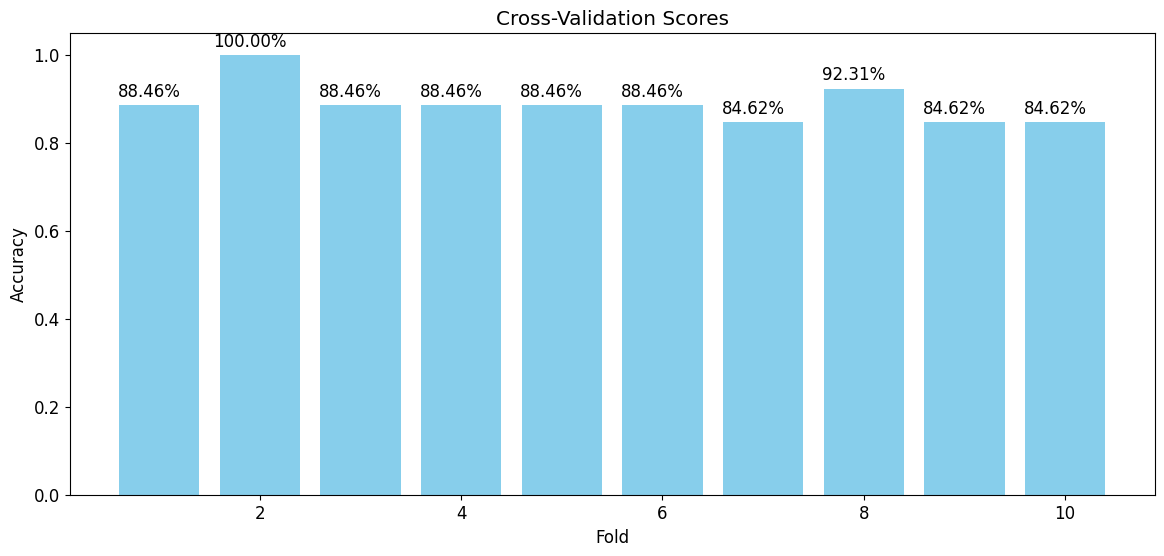

In [145]:
# extract the scores from the cross-validation results
cv_scores = scores
plt.figure(figsize=(14, 6))
# plot the scores using a bar chart
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue')

for i, score in enumerate(cv_scores):
    plt.text(i+0.9, score+0.02, f'{score*100:.2f}%', ha='center')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()



In [146]:
from sklearn.preprocessing import StandardScaler
# Normalize selected features using StandardScaler
scaler = StandardScaler()
X_selected = scaler.fit_transform(all_features[:, selected_features])
X_selected.shape

(260, 6)

In [147]:
# Split the data into training and testing sets
X_train_all, X_test, y_train_all, y_test = train_test_split(X_selected, labels, test_size=0.2, random_state=42)

In [148]:
print('Number of training images:', len(X_train_all))
print('Number of testing images:', len(X_test))
print('Number of training labels:',len(y_train_all))
print('Number of testing labels:',len(y_test))

Number of training images: 208
Number of testing images: 52
Number of training labels: 208
Number of testing labels: 52


In [149]:
print(X_train_all.shape)
print(X_test.shape)
print(y_train_all.shape)
print(y_test.shape)

(208, 6)
(52, 6)
(208,)
(52,)


In [150]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Train a linear SVM classifier
# define the parameter grid
param_grid = {
        'C': [0.1, 1, 10, 100], 
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale'], 
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)


# 3. Train the SVM on T for the selected hyperparameters
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# 4. Compute the accuracy of the trained model on V
val_score = grid_search.score(X_val, y_val)

# 5. Repeat steps 2-4 for 10-fold cross-validation
cross_val_scores = cross_val_score(grid_search, X_train_all, y_train_all, cv=10)

# 6. Compute the average accuracy obtained from 10-fold cross-validation
mean_cross_val_score = cross_val_scores.mean()

# 7. Repeat steps 1-6 for all (C, gamma) combinations Step 7 is not explicitly implemented in the code, but it is performed internally by GridSearchCV as it searches over all possible combinations of hyperparameters in param_grid.

# 8. Based on the best average accuracy obtained from the 10-fold cross-validation, select the hyperparameters and train the SVM on the T* dataset
best_svc = grid_search.best_estimator_
best_svc.fit(X_train_all, y_train_all)


# print the best parameters and score
print("All validation scores: ", cross_val_scores)
print("Mean validation score: ", mean_cross_val_score)
print("Best parameters: ", grid_search.best_params_)
print("Best SVM score: ", best_svc)

All validation scores:  [0.76190476 0.95238095 1.         0.85714286 0.71428571 0.9047619
 0.85714286 0.9047619  0.7        0.7       ]
Mean validation score:  0.8352380952380953
Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best SVM score:  SVC(C=1, gamma=0.1)


In [151]:
print("Validation accuracy: ", val_score)

Validation accuracy:  0.8571428571428571


In [152]:
# Evaluate the performance of the classifier
# 10. Calculate Performance on Testing set (unseen data)
y_pred = best_svc.predict(X_test)

# 11. Record the model performance accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.9230769230769231


In [153]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[26  2]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.92      0.92      0.92        24

    accuracy                           0.92        52
   macro avg       0.92      0.92      0.92        52
weighted avg       0.92      0.92      0.92        52



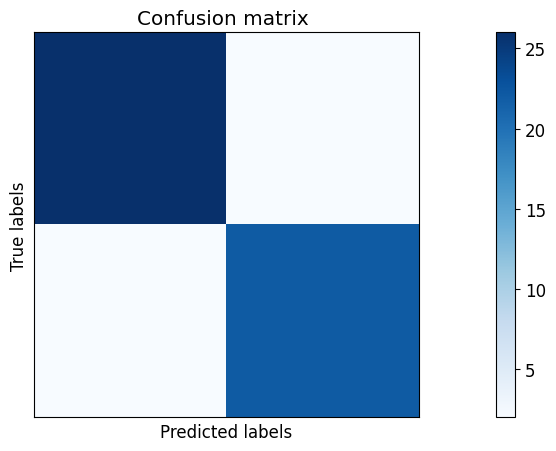

In [156]:
matrix = confusion_matrix(y_test,y_pred)
plt.imshow(matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [157]:
TP = matrix[1, 1]
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]

sensitivity = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print('Sensitivity:', sensitivity)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1_score:', f1_score)

Sensitivity: 0.9166666666666666
Precision: 0.9166666666666666
Specificity: 0.9285714285714286
F1_score: 0.9166666666666666


In [158]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred)
print('AUC Score:', auc_score)

AUC Score: 0.9226190476190476
